<a href="https://colab.research.google.com/github/jagmohan12/Artificial-Neural-Network-to-Recognise-Images-using-Keras-and-Tensorflow/blob/master/Jagmohan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

In [0]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
from IPython.display import display
from keras.models import Sequential
from keras.layers import Dense,Activation

Get the data


In [0]:
(x_train,y_train),(x_test,y_test)  =  cifar10.load_data()

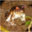

[6]


In [23]:
for i in range(1):
  pic = array_to_img(x_train[i])
  display(pic)
  print(y_train[i])
  #print(sep =  ' ',end = " ")
 

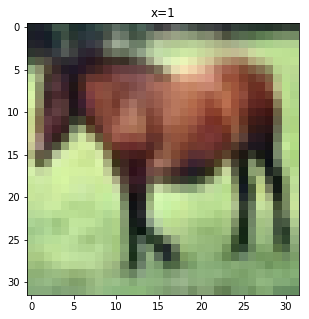

In [24]:
plt.figure(figsize=(15,5))
x = 1
plt.title('x={:}'.format(x))

plt.imshow(x_train[7])

plt.show()


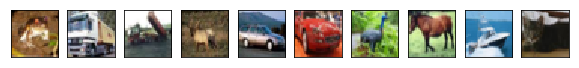

In [25]:
plt.figure(figsize=(10,5))

for i in range(10):
  
           plt.subplot(1,10,i+1)
           plt.xticks([])
           plt.yticks([])
           plt.imshow(x_train[i])
  

In [0]:
label = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [27]:
label[y_train[7][0]]

'horse'

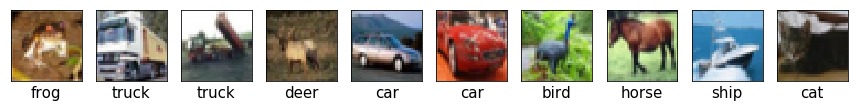

In [28]:
plt.figure(figsize=(15,5))

for i in range(10):
           plt.subplot(1,10,i+1)
           plt.xticks([])
           plt.yticks([])
           plt.xlabel(label[y_train[i][0]],fontsize=15)
           plt.imshow(x_train[i])
  

In [29]:
x_train.shape

(50000, 32, 32, 3)

In [30]:
y_train.shape


(50000, 1)

In [31]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [32]:
y_train[0]

array([6], dtype=uint8)

In [33]:
y_train[6]

array([2], dtype=uint8)

In [34]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [35]:
type(x_train[0][0][0][0]/255.0)

numpy.float64

In [0]:
x_train =  x_train / 255.0 
x_test =   x_test / 255.0

In [37]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 32*32*3)
x_test = x_test.reshape(x_test.shape[0], 32*32*3)


In [39]:
print(x_train.shape)

print(x_test.shape)

(50000, 3072)
(10000, 3072)


Validation dataset

In [40]:
x_val = x_train[:10000]
print(x_val.shape)

(10000, 3072)


In [0]:
y_val = y_train[:10000]

In [0]:
x_train = x_train[10000:]
y_train = y_train[10000:]

In [43]:
y_train.shape

(40000, 1)

Modeling

In [48]:
model_1 = Sequential([
    Dense(units = 128 , input_dim = 3072 ,activation = 'relu'),
    Dense(units = 64 , activation = 'relu'),
    Dense(units = 16 , activation = 'relu'),
    Dense(units = 10 , activation = 'softmax'),
])

W0831 06:29:46.969971 140195616249728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0831 06:29:46.984534 140195616249728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0831 06:29:46.997411 140195616249728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [49]:
type(model_1)

keras.engine.sequential.Sequential